In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.stats as ss

In [19]:
S0 = 100.0  # spot stock price
K = 100.0  # strike
T = 1.0  # maturity
r = 0.1  # risk free rate
sig = 0.2  # diffusion coefficient or volatility

In [20]:
e_ret = np.log(S0) + (r - 0.5 * sig**2) * T  # expected return of the log-price
vol = sig * np.sqrt(T)  # standard deviation of the log-price


# log-normal density (defined above)
def log_normal(x, e_ret, vol):
    return 1 / (x * vol * np.sqrt(2 * np.pi)) * np.exp(-((np.log(x) - e_ret) ** 2) / (2 * vol**2))

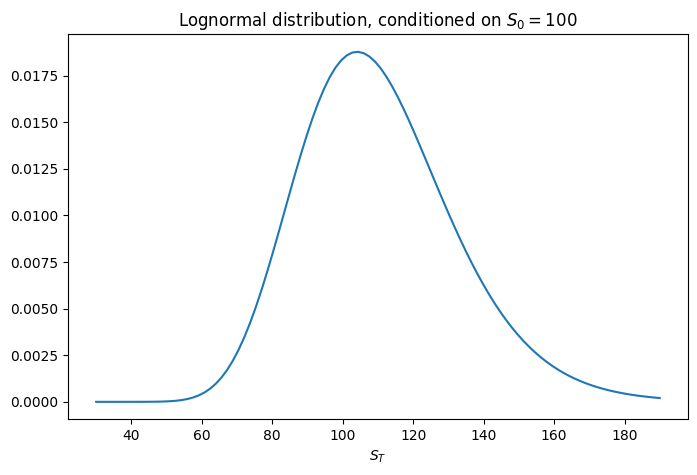

In [21]:
plt.figure(figsize=(8, 5))
x = np.linspace(30, 190, 100)
plt.plot(x, log_normal(x, e_ret, vol))
plt.title("Lognormal distribution, conditioned on $S_0=100$")
plt.xlabel("$S_T$")
plt.show()

In [22]:
def integrand_LN(S, strike, e_ret, vol, payoff):
    if payoff == "call":
        return (S - strike) * ss.lognorm.pdf(S, vol, scale=np.exp(e_ret))
    elif payoff == "put":
        return (strike - S) * ss.lognorm.pdf(S, vol, scale=np.exp(e_ret))


call = quad(integrand_LN, K, np.inf, args=(K, e_ret, vol, "call"))[0] * np.exp(-r * T)
put = quad(integrand_LN, 0, K, args=(K, e_ret, vol, "put"))[0] * np.exp(-r * T)

print("Call price: {} \nPut price: {} ".format(call, put))

Call price: 13.269676584660926 
Put price: 3.753418388256828 


In [23]:
# expected return of the log-price under the new measure
e_ret_1 = np.log(S0) + (r + 0.5 * sig**2) * T

Q1 = quad(lambda S: ss.lognorm.pdf(S, vol, scale=np.exp(e_ret_1)), K, np.inf)[0]
print("Risk neutral probability under stock numeraire,\n Q1 =", Q1)
Q2 = quad(lambda S: ss.lognorm.pdf(S, vol, scale=np.exp(e_ret)), K, np.inf)[0]
print("Risk neutral probability under money market numeraire,\n Q2 =", Q2)

print("BS call price: ", S0 * Q1 - K * np.exp(-r * T) * Q2)

Risk neutral probability under stock numeraire,
 Q1 = 0.7257468822499276
Risk neutral probability under money market numeraire,
 Q2 = 0.6554217416103069
BS call price:  13.26967658466257
